In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import tools.functions as func

from datetime import datetime, date,timedelta
from matplotlib import gridspec
from matplotlib import cm

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#filenames
FILE_SOIL = 'k34_SPCD30_2012_2017_v2.csv'
FILE_MET = 'k34_Met_Soil_v0.csv'
FILE_SOIL_R = 'SWC_R_Corrected.pkl'

In [3]:
# read data
df_soil = pd.read_csv(FILE_SOIL,header = 0, na_values='-9999')
df_met = pd.read_csv(FILE_MET, header = 0, na_values = '-9999')
df_soil_r = pd.read_pickle(FILE_SOIL_R)

In [4]:
time_met = [datetime.strptime(str(i),'%Y%m%d%H%M') for i in df_met['TIMESTAMP_START']]
time_soil = [datetime.strptime(str(i),'%Y%m%d%H%M') for i in df_soil['TIMESTAMP_START']]
time_soil_r = df_soil_r['TIMESTAMP']

In [5]:
df_met['DATE'] = [datetime.date(i) for i in time_met]
df_met.head()

,TIMESTAMP_START,TIMESTAMP_END,G,SWC_1,SWC_2,SWC_3,SWC_4,SWC_5,SWC_6,TS_1,...,CO2_4,CO2_5,CO2_6,LW_IN_CORR,LW_OUT_CORR,PPFD_IN_2,Rho_PAR,Rho_OIR,NDVI,DATE
0,201201010000,201201010030,-2.595333,NaN,NaN,NaN,NaN,NaN,NaN,24.073333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
1,201201010030,201201010100,-2.882667,NaN,NaN,NaN,NaN,NaN,NaN,24.006667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
2,201201010100,201201010130,-3.149000,NaN,NaN,NaN,NaN,NaN,NaN,23.903333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
3,201201010130,201201010200,-3.426333,NaN,NaN,NaN,NaN,NaN,NaN,23.863333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
4,201201010200,201201010230,-3.579333,NaN,NaN,NaN,NaN,NaN,NaN,23.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01


In [6]:
# compare land surface temperature with air temperature
Data_LST = np.load('LST_GEOS.npz')

In [7]:
print(Data_LST['time'][:5])

[datetime.datetime(2015, 1, 1, 0, 0)
 datetime.datetime(2015, 1, 1, 0, 59, 59, 999987)
 datetime.datetime(2015, 1, 1, 2, 0, 0, 13)
 datetime.datetime(2015, 1, 1, 3, 0)
 datetime.datetime(2015, 1, 1, 3, 59, 59, 999987)]


In [8]:
LST_time_local = [i - timedelta(hours = 4) for i in Data_LST['time']]

In [9]:
print(Data_LST['time'][:5],LST_time_local[:5])

[datetime.datetime(2015, 1, 1, 0, 0)
 datetime.datetime(2015, 1, 1, 0, 59, 59, 999987)
 datetime.datetime(2015, 1, 1, 2, 0, 0, 13)
 datetime.datetime(2015, 1, 1, 3, 0)
 datetime.datetime(2015, 1, 1, 3, 59, 59, 999987)] [datetime.datetime(2014, 12, 31, 20, 0), datetime.datetime(2014, 12, 31, 20, 59, 59, 999987), datetime.datetime(2014, 12, 31, 22, 0, 0, 13), datetime.datetime(2014, 12, 31, 23, 0), datetime.datetime(2014, 12, 31, 23, 59, 59, 999987)]


In [10]:
time_start = pd.Timestamp('2015-10-01')
time_end = pd.Timestamp('2015-10-07')

(735872.0, 735878.0)

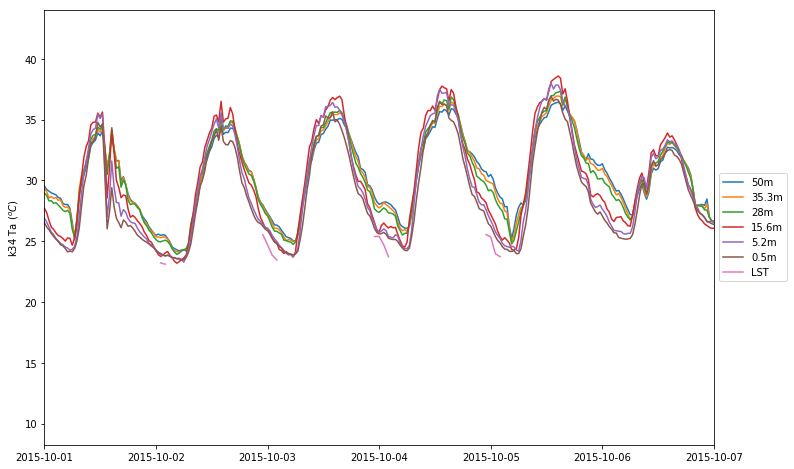

In [11]:
# Plot temperature
fig2, ax = plt.subplots(figsize=[12,8],nrows=1,sharex = True)

ax.plot(time_met,df_met['TA_1'],
             time_met,df_met['TA_2'],
             time_met,df_met['TA_3'],
             time_met,df_met['TA_4'],
             time_met,df_met['TA_5'],
             time_met,df_met['TA_6'],
            LST_time_local,(Data_LST['LST']-273.15))
# ax[idx].set_ylim(0,1)
ax.legend(('50m','35.3m', '28m','15.6m','5.2m','0.5m','LST'),loc = 'center left',bbox_to_anchor=(1, 0.5))
ax.set_ylabel('k34 Ta ($^oC$)')
ax.set_xlim(time_start, time_end)

Text(0, 0.5, 'k34 T ($^oC$)')

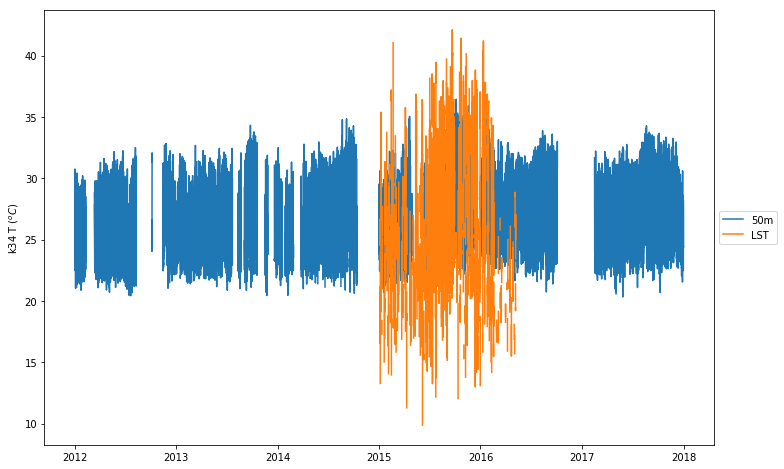

In [12]:
# Plot temperature
fig2, ax = plt.subplots(figsize=[12,8])

ax.plot(time_met,df_met['TA_1'],
            LST_time_local,(Data_LST['LST']-273.15))
# ax[idx].set_ylim(0,1)
ax.legend(('50m','LST'),loc = 'center left',bbox_to_anchor=(1, 0.5))
ax.set_ylabel('k34 T ($^oC$)')

In [13]:
time_start = pd.Timestamp('2015-01-1')
time_end = pd.Timestamp('2015-12-31')

(735599.0, 735963.0)

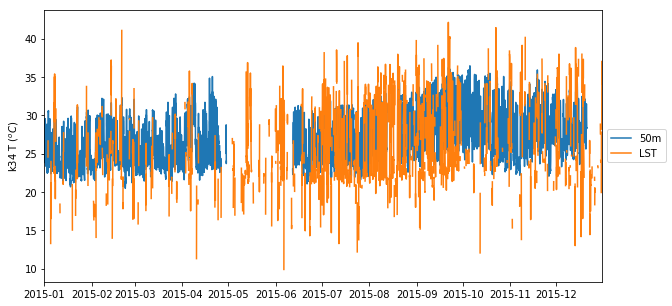

In [14]:
fig2, ax = plt.subplots(figsize=[10,5])

ax.plot(time_met,df_met['TA_1'],
            LST_time_local,(Data_LST['LST']-273.15))
# ax[idx].set_ylim(0,1)
ax.legend(('50m','LST'),loc = 'center left',bbox_to_anchor=(1, 0.5))
ax.set_ylabel('k34 T ($^oC$)')
ax.set_xlim(time_start, time_end)

In [15]:
time_start = pd.Timestamp('2015-10-15')
time_end = pd.Timestamp('2015-10-30')

In [59]:
time_start = pd.Timestamp('2015-07-01')
time_end = pd.Timestamp('2015-08-01')

(735886.0, 735901.0)

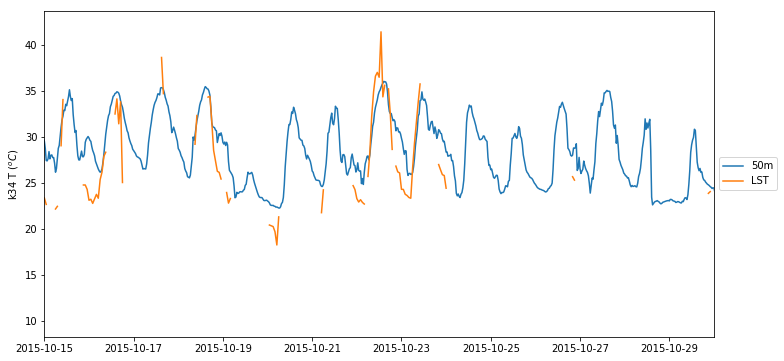

In [17]:
fig2, ax = plt.subplots(figsize=[12,6])

ax.plot(time_met,df_met['TA_1'],
            LST_time_local,(Data_LST['LST']-273.15))
# ax[idx].set_ylim(0,1)
ax.legend(('50m','LST'),loc = 'center left',bbox_to_anchor=(1, 0.5))
ax.set_ylabel('k34 T ($^oC$)')
ax.set_xlim(time_start, time_end)